<a href="https://colab.research.google.com/github/Kanika1123/lung_cancer_prediction/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Define dataset path (Modify this based on your setup)
dataset_path = "/content/drive/MyDrive/IQ-OTHNCCD (1)/The IQ-OTHNCCD lung cancer dataset"

# Set Image Size and Batch Size
img_size = (256, 256)
batch_size = 16


In [ ]:
# Data Augmentation & Normalization
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)


In [ ]:
# Training Data Generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

# Validation Data Generator
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)


Found 878 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


In [ ]:
# Load Pre-trained MobileNetV2 Model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(256, 256, 3),
    include_top=False,
    weights="imagenet"
)

# Freeze Pre-trained Layers
base_model.trainable = False


<ipython-input-6-8f3d9aa7ea70>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Custom Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.Dropout(0.5),  # Increased dropout to prevent overfitting
    layers.Dense(3, activation='softmax')  # 3-class classification
])


In [ ]:
# Compile Model with Lower Learning Rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


In [ ]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=20,  # Increased epochs but early stopping will prevent overfitting
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5773 - loss: 1.1658

55/55 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 0.5787 - loss: 1.1638 - val_accuracy: 0.7534 - val_loss: 0.8451
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.8011 - loss: 0.7514

55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 461ms/step - accuracy: 0.8008 - loss: 0.7517 - val_accuracy: 0.7808 - val_loss: 0.8021
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.8367 - loss: 0.6711

55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 458ms/step - accuracy: 0.8365 - loss: 0.6713 - val_accuracy: 0.8174 - val_loss: 0.7916
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.8380 - loss: 0.6207

55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 458ms/step - accuracy: 0.8380 - loss: 0.6207 - val_accuracy: 0.7808 - val_loss: 0.7807
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.8096 - loss: 0.6509

55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 460ms/step - accuracy: 0.8102 - loss: 0.6502 - val_accuracy: 0.8219 - val_loss: 0.7489
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 27s 485ms/step - accuracy: 0.8420 - loss: 0.5512 - val_accuracy: 0.8219 - val_loss: 0.7609
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.8247 - loss: 0.6064

55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 456ms/step - accuracy: 0.8249 - loss: 0.6056 - val_accuracy: 0.8539 - val_loss: 0.7228
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 454ms/step - accuracy: 0.8731 - loss: 0.5293 - val_accuracy: 0.8447 - val_loss: 0.7499
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.8673 - loss: 0.5085

55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 457ms/step - accuracy: 0.8673 - loss: 0.5085 - val_accuracy: 0.8721 - val_loss: 0.7074
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.8664 - loss: 0.4966

55/55 ━━━━━━━━━━━━━━━━━━━━ 42s 485ms/step - accuracy: 0.8664 - loss: 0.4966 - val_accuracy: 0.8767 - val_loss: 0.7036
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 456ms/step - accuracy: 0.8642 - loss: 0.5203 - val_accuracy: 0.8539 - val_loss: 0.7247
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 539ms/step - accuracy: 0.8689 - loss: 0.4882 - val_accuracy: 0.8630 - val_loss: 0.7269
Epoch 13/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 453ms/step - accuracy: 0.8632 - loss: 0.4949 - val_accuracy: 0.8584 - val_loss: 0.7557
Epoch 14/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 450ms/step - accuracy: 0.8804 - loss: 0.4733 - val_accuracy: 0.8447 - val_loss: 0.7367
Epoch 15/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.8648 - loss: 0.4869

55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 567ms/step - accuracy: 0.8651 - loss: 0.4864 - val_accuracy: 0.8539 - val_loss: 0.6994
Epoch 16/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 451ms/step - accuracy: 0.8997 - loss: 0.4408 - val_accuracy: 0.8356 - val_loss: 0.7437
Epoch 17/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 450ms/step - accuracy: 0.8817 - loss: 0.4676 - val_accuracy: 0.8539 - val_loss: 0.7391
Epoch 18/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 447ms/step - accuracy: 0.8981 - loss: 0.4284 - val_accuracy: 0.8539 - val_loss: 0.7507
Epoch 19/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 454ms/step - accuracy: 0.8898 - loss: 0.4266 - val_accuracy: 0.8356 - val_loss: 0.7583
Epoch 20/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 26s 475ms/step - accuracy: 0.8877 - loss: 0.4486 - val_accuracy: 0.8630 - val_loss: 0.7500


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


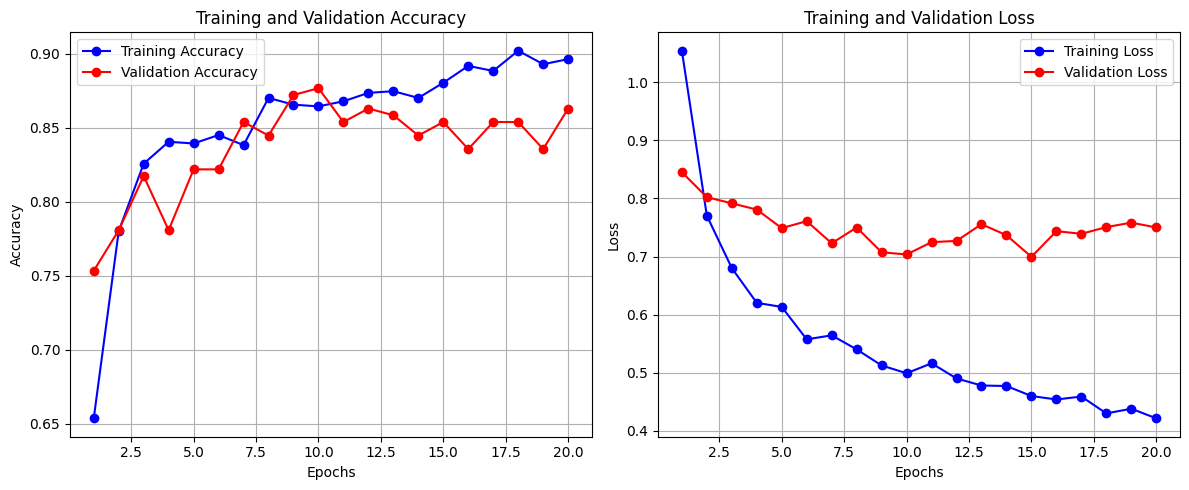

In [ ]:
print(history.history.keys())
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Then call the function
plot_training_history(history)



In [ ]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get true labels and predictions from validation set
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)  # For multi-class
# For binary: y_pred = (y_pred_probs > 0.5).astype(int)

# Print classification report
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))


14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 570ms/step
                 precision    recall  f1-score   support

   Benign cases       0.41      0.29      0.34        24
Malignant cases       0.95      1.00      0.97       112
   Normal cases       0.80      0.81      0.80        83

       accuracy                           0.85       219
      macro avg       0.72      0.70      0.71       219
   weighted avg       0.83      0.85      0.84       219



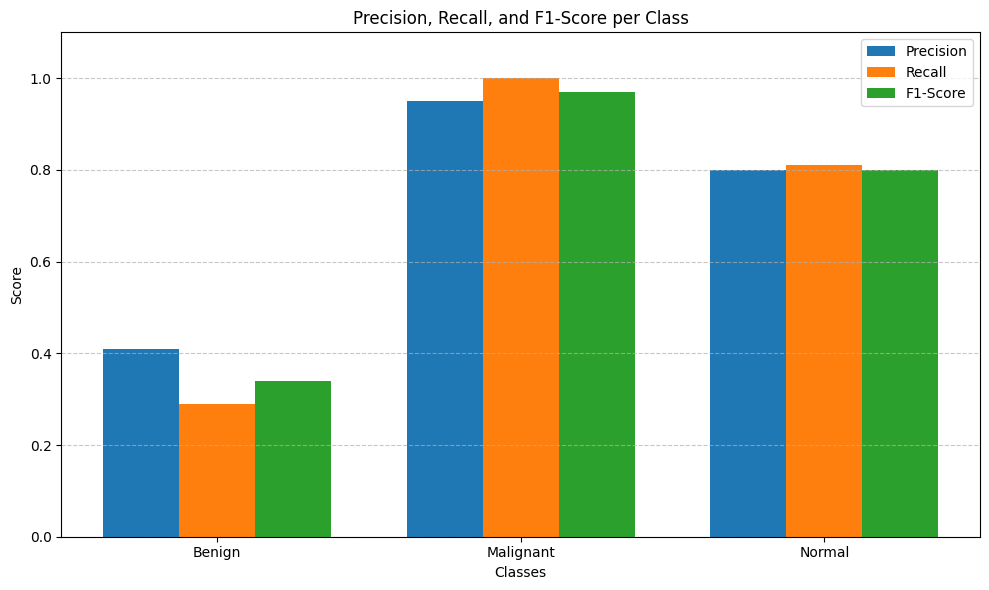

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics from classification report
classes = ['Benign', 'Malignant', 'Normal']
precision = [0.41, 0.95, 0.80]
recall =    [0.29, 1.00, 0.81]
f1_score =  [0.34, 0.97, 0.80]

x = np.arange(len(classes))  # label locations
width = 0.25  # width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-Score')

plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class')
plt.xticks(x, classes)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step


<Figure size 800x600 with 0 Axes>

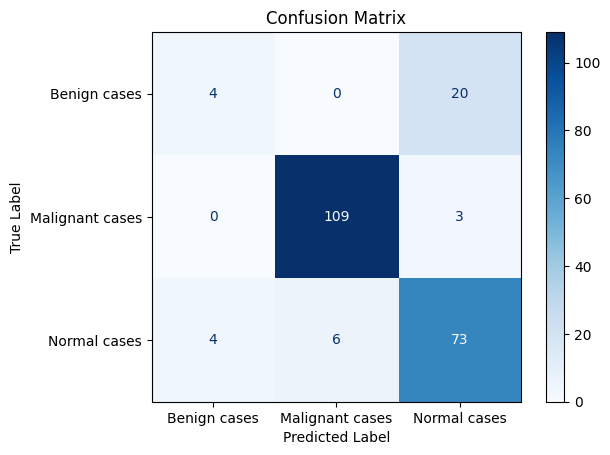

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Get the true labels and predictions
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = y_pred_probs.argmax(axis=1)  # for multi-class classification

# Step 2: Get class labels (in correct order)
class_names = list(val_generator.class_indices.keys())

# Step 3: Generate and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()
